In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
START_YEAR = 1981

In [3]:
raw_df = pd.read_csv('public_emdat.csv')
has_costs = raw_df[raw_df['Total Damage, Adjusted (\'000 US$)'].notna()]

In [4]:
has_costs['Year'] = has_costs['DisNo.'].apply(lambda x: int(x[:4]))

C:\Users\issac\AppData\Local\Temp\ipykernel_152752\1654396794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_costs['Year'] = has_costs['DisNo.'].apply(lambda x: int(x[:4]))


In [13]:
recent = has_costs[has_costs['Year'] >= 1965]
grouped = recent.groupby('Year').mean(numeric_only=True).reset_index()

In [14]:
def find_line(x,y):
    x_standard = (x - np.mean(x)) / np.std(x)
    y_standard = (y - np.mean(y)) / np.std(y)
    r = np.mean(x_standard * y_standard)
    m = r * np.std(y) / np.std(x)
    b = np.mean(y) - m * np.mean(x)
    return m,b

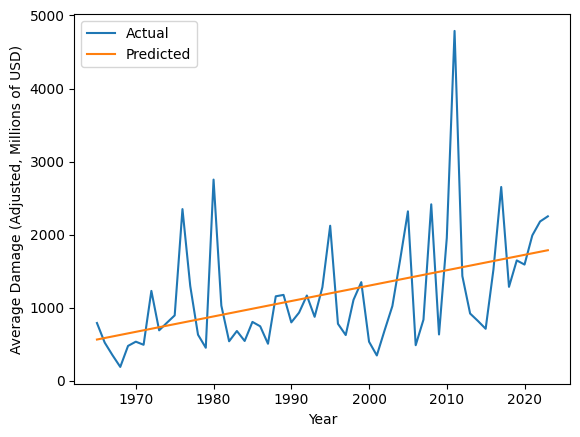

In [17]:
year, cost = grouped['Year'].to_numpy(), grouped['Total Damage, Adjusted (\'000 US$)'].to_numpy() / 1000
m, b = find_line(year, cost)
x = np.array([year[0], year[-1]])
y = m * x + b

plt.plot(year, cost, label='Actual')
plt.plot(x, y, label='Predicted')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Average Damage (Adjusted, Millions of USD)')
plt.show()